# Module 3
## Big Data in Geographic Information Systems
#### Peracchi Marco 800578

Import of the libraries

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl

import numpy as np
import pandas as pd

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point

import xarray as xr

## Reading data
Reading the three models available

### Model 1
Reading first model

In [2]:
modfile='./ts_Amon_IPSL-CM6A-LR_historical_r1i1p1f1_gr_185001-201412.nc'
m_variable='./ts_Amon_'
m_case='_historical_r1i1p1f1_gr_185001-201412.nc'
model=modfile[len(m_variable):-len(m_case)]

#- Open file
d1d = xr.open_dataset(modfile)

#- extract variable (ts)
ts = d1d.ts  
print(ts)

<xarray.DataArray 'ts' (time: 1980, lat: 143, lon: 144)>
[40772160 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 -90.0 -88.73 -87.46 -86.2 ... 86.2 87.46 88.73 90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:00:00
Attributes:
    long_name:           Surface Temperature
    units:               K
    online_operation:    average
    cell_methods:        area: time: mean
    interval_operation:  900 s
    interval_write:      1 month
    standard_name:       surface_temperature
    description:         Surface temperature (skin for open ocean)
    history:             none
    cell_measures:       area: areacella


Plot the first model

In [3]:
plt.rcParams['figure.figsize'] = (9,6)

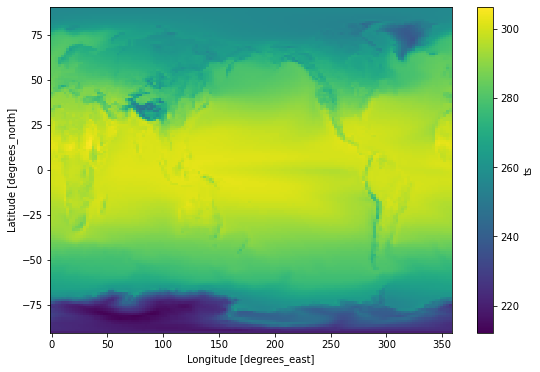

In [4]:
ts.mean(axis=0).plot()

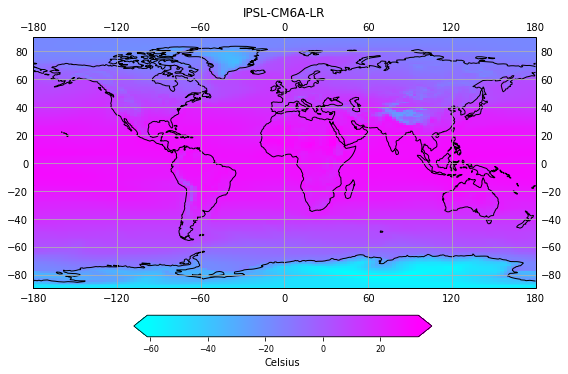

In [5]:
ts_avg_cyc, lon_cyc = add_cyclic_point(ts.mean(axis=0)-273.15, coord=ts.lon)  # also Kelvin to Celsius

fig = plt.figure(figsize=(9,6))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_title(''.join([model,'\n']))
ax.set_global()
mm = ax.pcolormesh(lon_cyc, ts.lat, ts_avg_cyc, \
                   transform=ccrs.PlateCarree(),cmap=mpl.cm.cool )  

ax.coastlines()
ax.gridlines(draw_labels=True)

#- add colorbar
cbar_ax = fig.add_axes([0.28, 0.10, 0.46, 0.05]) #[left, bottom, width, height]
cbar = fig.colorbar(mm, cax=cbar_ax, extend='both', orientation='horizontal')
cbar.set_label('Celsius')
cbar.ax.tick_params(labelsize=8)

plt.show()
plt.close()

### Model 2
Reading the second model

In [6]:
modfile2='./ts_Amon_MRI-ESM2-0_historical_r1i1p1f1_gn_185001-201412.nc'

m_variable='./ts_Amon_'
m_case='_historical_r1i1p1f1_gr_185001-201412.nc'
model2=modfile2[len(m_variable):-len(m_case)]
m2 = xr.open_dataset(modfile2)

#- extract variable (ts)
ts2 = m2.ts  
print(ts2)

<xarray.DataArray 'ts' (time: 1980, lat: 160, lon: 320)>
[101376000 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lat      (lat) float64 -89.14 -88.03 -86.91 -85.79 ... 86.91 88.03 89.14
  * lon      (lon) float64 0.0 1.125 2.25 3.375 4.5 ... 355.5 356.6 357.8 358.9
Attributes:
    standard_name:  surface_temperature
    long_name:      Surface Temperature
    comment:        Temperature of the lower boundary of the atmosphere
    units:          K
    original_name:  TGEF
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2019-02-20T02:26:51Z altered by CMOR: replaced missing va...


Plotting the second model

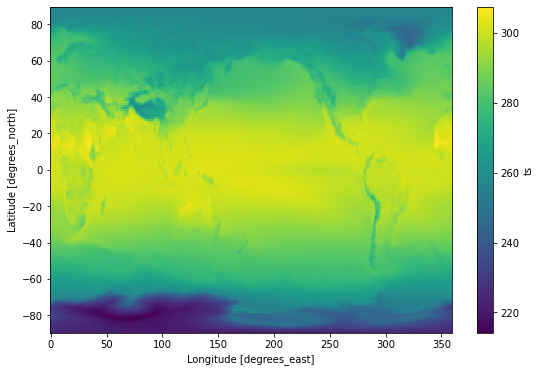

In [7]:
ts2.mean(axis=0).plot()

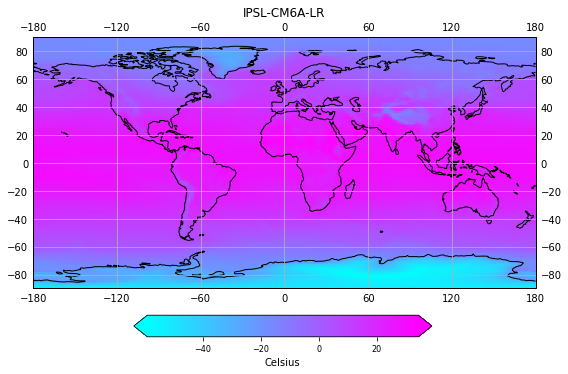

In [8]:
ts_avg_cyc, lon_cyc = add_cyclic_point(ts2.mean(axis=0)-273.15, coord=ts2.lon)  # also Kelvin to Celsius

fig = plt.figure(figsize=(9,6))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_title(''.join([model,'\n']))
ax.set_global()
mm = ax.pcolormesh(lon_cyc, ts2.lat, ts_avg_cyc, \
                   transform=ccrs.PlateCarree(),cmap=mpl.cm.cool )  

ax.coastlines()
ax.gridlines(draw_labels=True)

#- add colorbar
cbar_ax = fig.add_axes([0.28, 0.10, 0.46, 0.05]) #[left, bottom, width, height]
cbar = fig.colorbar(mm, cax=cbar_ax, extend='both', orientation='horizontal')
cbar.set_label('Celsius')
cbar.ax.tick_params(labelsize=8)

plt.show()
plt.close()

### Model 3
Read the third model, in this case we need to read two files at the same time

In [9]:
modfile3='./ts_Amon_MIROC6_historical_r1i1p1f1_gn_185001-194912.nc'

m_variable='./ts_Amon_'
m_case='_historical_r1i1p1f1_gn_185001-194912.nc'
model3=modfile2[len(m_variable):-len(m_case)]

modfile4='./ts_Amon_MIROC6_historical_r1i1p1f1_gn_195001-201412.nc'

m_variable='./ts_Amon_'
m_case='_historical_r1i1p1f1_gn_195001-201412.nc'
model4=modfile2[len(m_variable):-len(m_case)]

m3 = xr.open_mfdataset([modfile3, modfile4])

#- extract variable (ts)
ts3 = m3.ts  
print(ts3)

<xarray.DataArray 'ts' (time: 1980, lat: 128, lon: 256)>
dask.array<concatenate, shape=(1980, 128, 256), dtype=float32, chunksize=(1200, 128, 256), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lat      (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
  * lon      (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
Attributes:
    standard_name:  surface_temperature
    long_name:      Surface Temperature
    comment:        Temperature of the lower boundary of the atmosphere
    units:          K
    original_name:  GRTS
    cell_methods:   area: time: mean
    cell_measures:  area: areacella
    history:        2018-11-30T16:15:08Z altered by CMOR: replaced missing va...


Plotting the third model

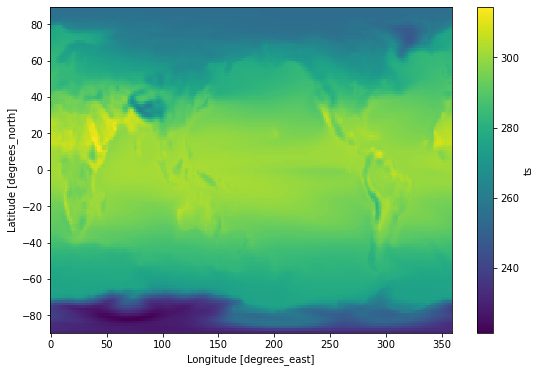

In [10]:
ts3.mean(axis=0).plot()

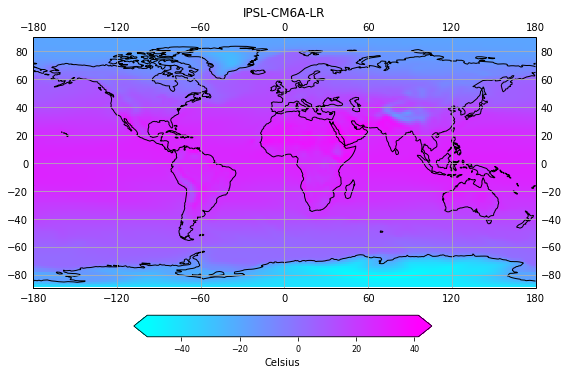

In [11]:
ts_avg_cyc, lon_cyc = add_cyclic_point(ts3.mean(axis=0)-273.15, coord=ts3.lon)  # also Kelvin to Celsius

fig = plt.figure(figsize=(9,6))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_title(''.join([model,'\n']))
ax.set_global()
mm = ax.pcolormesh(lon_cyc, ts3.lat, ts_avg_cyc, \
                   transform=ccrs.PlateCarree(),cmap=mpl.cm.cool )  

ax.coastlines()
ax.gridlines(draw_labels=True)

#- add colorbar
cbar_ax = fig.add_axes([0.28, 0.10, 0.46, 0.05]) #[left, bottom, width, height]
cbar = fig.colorbar(mm, cax=cbar_ax, extend='both', orientation='horizontal')
cbar.set_label('Celsius')
cbar.ax.tick_params(labelsize=8)

plt.show()
plt.close()

## Multi-Model Ensemble
Creating the multi-model ensemble of the three previous models

In [12]:
ts_avg=ts.mean(axis=0)-273.15

We need to apply regridding for the model 2 and 3, because there are differences in latitude data

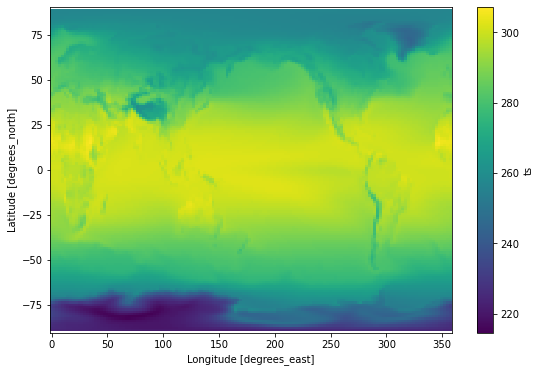

In [13]:
ts2i = ts2.interp(lat=ts.lat, lon=ts.lon, method='linear')
ts2i.mean(axis=0).plot()
ts2i_avg = ts2i.mean(axis=0)-273.15

C:\Users\Marco\.conda\envs\geographic\lib\site-packages\dask\array\numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


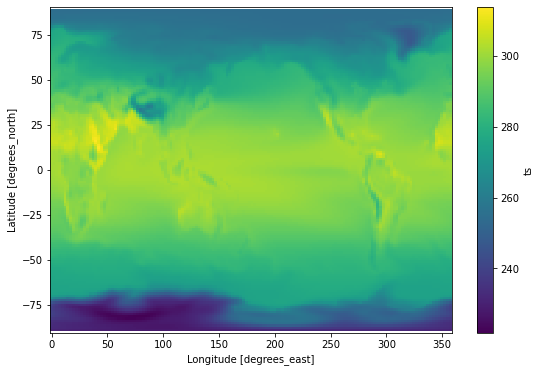

In [14]:
ts3i = ts3.interp(lat=ts.lat, lon=ts.lon, method='linear')
ts3i.mean(axis=0).plot()
ts3i_avg = ts3i.mean(axis=0)-273.15

Compute of the ensemble

In [15]:
ens_mean = np.nanmean([ts_avg,ts2i_avg,ts3i_avg],axis=0)

C:\Users\Marco\.conda\envs\geographic\lib\site-packages\dask\array\numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
C:\Users\Marco\.conda\envs\geographic\lib\site-packages\dask\array\numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
C:\Users\Marco\.conda\envs\geographic\lib\site-packages\dask\array\numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


Finally plotting the multi-model ensemble

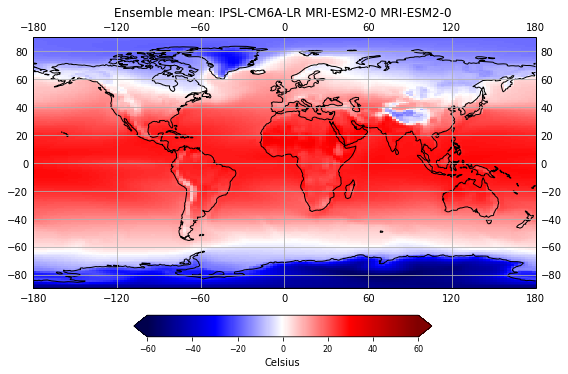

In [17]:
tmax = 60
norm = mpl.colors.Normalize(vmin=-tmax,vmax=tmax) 
cmap = mpl.cm.seismic

fig = plt.figure(figsize=(9,6))

ts_avg_cyc, lon_cyc = add_cyclic_point(ts.mean(axis=0)-273.15, coord=ts.lon)  # also Kelvin to Celsius

ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_title(' '.join(['Ensemble mean:',model,model2,model3,'\n']))
ax.set_global()
mm = ax.pcolormesh(lon_cyc, ts.lat, ens_mean, \
                   transform=ccrs.PlateCarree(),cmap=mpl.cm.seismic, norm = norm )  
ax.coastlines()
ax.gridlines(draw_labels=True)

cbar_ax = fig.add_axes([0.28, 0.10, 0.46, 0.05]) #[left, bottom, width, height]
cbar = fig.colorbar(mm, cax=cbar_ax, extend='both', orientation='horizontal')
cbar.set_label('Celsius')
cbar.ax.tick_params(labelsize=8)

plt.show()
plt.close()

## Global average temperature
In this section there is a tentative to compute the global average temperature.

First we compute the global average simply applying a mean to all data present

Text(0.5, 0, 'Time')

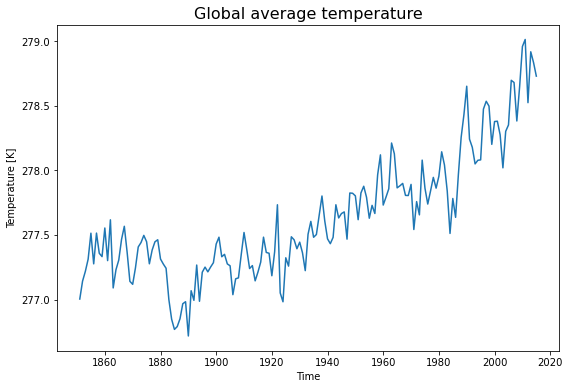

In [18]:
ts_year = ts.resample(time='1Y').mean() # Mean per year
group = ts_year.groupby("time").mean(...) # Mean accross all data available
plt.plot(group.time, group)
plt.title("Global average temperature", fontsize = 16)
plt.ylabel("Temperature [K]")
plt.xlabel("Time")

Now we compute means of different cells for every year, and than we compute the mean of every cell's temperature. Defining a grid.

In [19]:
resol = 20 #5  # degrees (E and N)
nlon = np.int(360/resol)
nlat = np.int(180/resol)

# define grid cell margins

grlons = np.empty([nlon+1],dtype='float') 
grlats = np.empty([nlat+1],dtype='float') 
grlons[0] = 0.
grlats[0] = -90.
for i in range(1,nlon+1):
    grlons[i]=grlons[i-1]+resol
for i in range(1,nlat+1):
    grlats[i]=grlats[i-1]+resol

Computing mean for every cell

In [20]:
temp = []
for k in range(0,len(ts_year)):
    in_series = []
    for j in range(0, (len(grlats) - 1)):
        for i in range(0, (len(grlons)-1)):
            res = ts_year[k,(ts_year.lat >= grlats[j])&(ts_year.lat < grlats[j+1]),(ts_year.lon >= grlons[i]) & (ts_year.lon < grlons[i+1])].mean()
            in_series.append(float(res.values))
    temp.append(in_series)

In [21]:
temp = pd.DataFrame(temp, index = pd.date_range("1850", "2015", freq = "Y"))

Computing global average

In [22]:
temp_avg_year = temp.mean(axis = 1)

Plotting results

Text(0, 0.5, 'Temperature [K]')

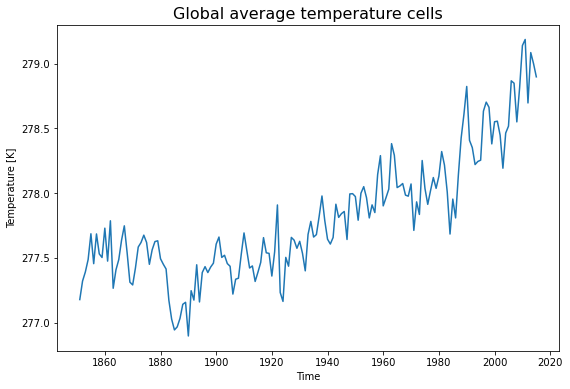

In [23]:
plt.plot(temp_avg_year)
plt.title("Global average temperature cells", fontsize = 16)
plt.xlabel("Time")
plt.ylabel("Temperature [K]")

Now we compare the two time series obtained

Text(0.5, 1.0, 'Comparison')

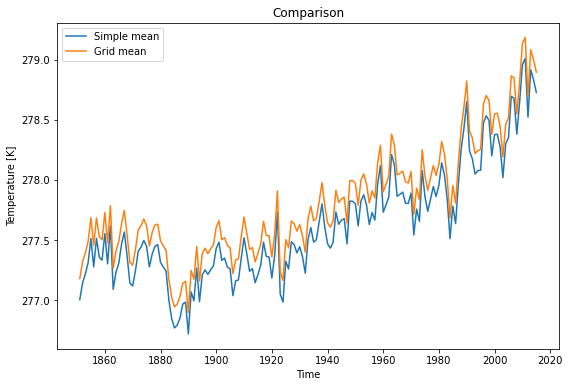

In [24]:
plt.plot(temp_avg_year.index,group)
plt.plot(temp_avg_year)
plt.xlabel("Time")
plt.legend(("Simple mean", "Grid mean"))
plt.ylabel("Temperature [K]")
plt.title("Comparison")

The difference seems to be a constant, we check now this assumption.

Text(0.5, 1.0, 'Difference')

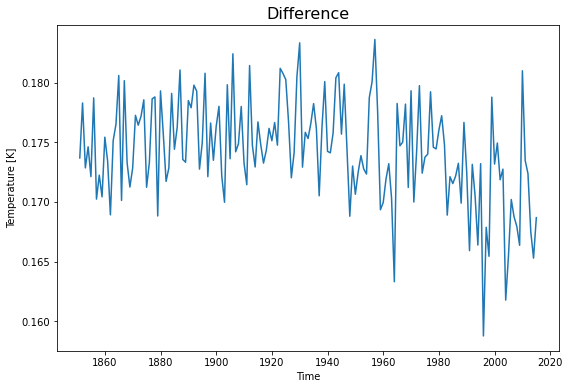

In [25]:
plt.plot(temp_avg_year - group)
plt.xlabel("Time")
plt.ylabel("Temperature [K]")
plt.title("Difference", fontsize = 16)

The two time series are a little bit different.

## Comparison between Multi-model ensemble and HadCRUT4 model

Now we compare the two models, we are going to import the same dataset created at the end of the previous assignments and import the dataset HadCRUT4, because we are going to use the same reference period and temperature and we need to compute it

In [124]:
gmta = pd.read_csv("gmta_10295_stations.csv")
gmta["time"] = pd.to_datetime(gmta["time"])
gmta = gmta.set_index("time")
data0 = pd.read_csv("data0.csv")
data0["time"] = pd.to_datetime(data0["time"])
data0 = data0.set_index("time")

Compute the average year mean that is the reference

In [125]:
data_ref = data0.mean(axis=1).groupby(data0.index.year).mean().reset_index()
data_ref["time"] = pd.to_datetime(data_ref["time"], format = "%Y")
data_ref = data_ref.set_index("time")

Now we select only the interesting year

In [126]:
ensemble = group.loc["1901":"2014"]
hadcrut = gmta.loc["1901":"2014"]
data_ref_mean = data_ref["1961":"1990"].mean()

We compute the temperature anomalies with respect to 1961-1990 period

In [127]:
ensemble = ensemble - 273.15

In [129]:
# Reference di HadCRUT4
ensemble_ref = ensemble - data_ref_mean[0]

In [131]:
# Reference multi-model ensemble itself
ensemble_ref = ensemble - ensemble.loc["1961":"1990"].mean()

Finally we plot the results

Text(0, 0.5, 'Temperature anomalies')

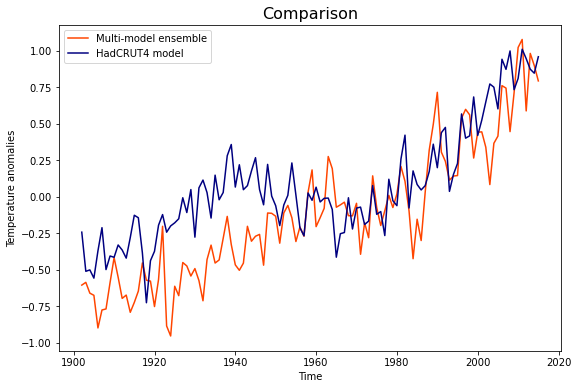

In [132]:
plt.plot(hadcrut.index, ensemble_ref, color = "orangered")
plt.plot(hadcrut["gmta"], color = "navy")
plt.title("Comparison", fontsize = 16)
plt.legend(("Multi-model ensemble","HadCRUT4 model"))
plt.xlabel("Time")
plt.ylabel("Temperature anomalies")